In [2]:
import pandas as pd
import numpy as np
import  as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Fields are ging to be used
# happy:    How happy would you say you are?
# sclmeet:  How often do you meet socially with friends, relatives or work colleagues?
# hinctnta: Household's total net income, all sources

# Read data from csv file into a dataframe (To run it this path must be changed)
data_df = pd.read_csv("https://raw.githubusercontent.com/JoanFerrerSerrat/Reports/master/Source/MoneyVsSociabilityToGetHappier.csv", usecols=["happy", "sclmeet", "hinctnta"])

data_df.head()

,happy,sclmeet,hinctnta
0,5,6,77
1,5,4,5
2,8,4,2
3,8,4,4
4,5,6,2


In [3]:
# how it works with deciles (Income)
# http://wikiprogress.org/articles/inequality/deciles/

# change column names to make naming more intuitive
data_df.columns = ["hapiness", "sociability", "income"]

# Remove unuseful data of income (no answer, don't know, ...)
data_df = data_df[data_df["hapiness"] < 77]

data_df.head()

,hapiness,sociability,income
0,5,6,77
1,5,4,5
2,8,4,2
3,8,4,4
4,5,6,2


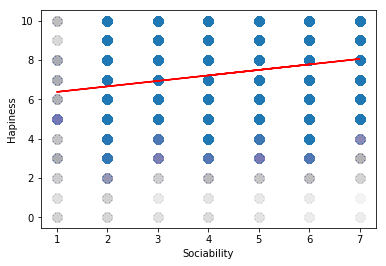

In [12]:
# X = Hapiness Y = sociability
# Remove unuseful data of hapiness (no answer, don't know, ...)
data_sociability_df = data_df[data_df['sociability'] < 77] #36445

X_sociability = data_sociability_df['sociability'].values.reshape(-1, 1)
Y_sociability = data_sociability_df['hapiness'].values.reshape(-1, 1)

linear_regressor = LinearRegression()
linear_regressor.fit(X_sociability, Y_sociability)
Y_pred_sociability = linear_regressor.predict(X_sociability)

plt.scatter(X_sociability, Y_sociability, s=100, alpha=0.00197)
plt.plot(X_sociability, Y_pred_sociability, color='red')
plt.xlabel('Sociability')
plt.ylabel('Hapiness')
plt.show()

In [6]:
# model evaluation 
mse = mean_squared_error(Y_sociability, Y_pred_sociability) 
  
rmse = np.sqrt(mean_squared_error(Y_sociability, Y_pred_sociability)) 
r2 = r2_score(Y_sociability, Y_pred_sociability) 
  
# printing values 
print('MSE of Linear model', mse) 
print('R2 score of Linear model: ', r2)

MSE of Linear model 3.2632832749923137
R2 score of Linear model:  0.05495349165341423


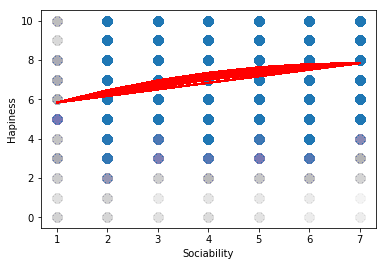

In [13]:
# Try if it's polynomial degree 2
poly_features = PolynomialFeatures(degree = 2) 
x_poly = poly_features.fit_transform(X_sociability)

lin_reg = LinearRegression() 
lin_reg.fit(x_poly, Y_sociability) 
y_pred = lin_reg.predict(x_poly)

plt.scatter(X_sociability, Y_sociability, s=100, alpha=0.00197)
plt.plot(X_sociability, y_pred, color='red')
plt.xlabel('Sociability')
plt.ylabel('Hapiness')
plt.show()

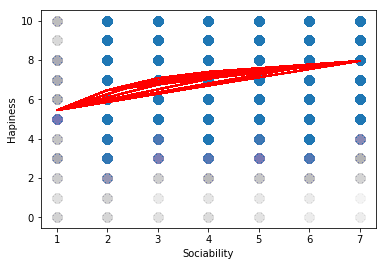

In [14]:
# Try if it's polynomial degree 3
poly_features = PolynomialFeatures(degree = 3) 
x_poly = poly_features.fit_transform(X_sociability)

lin_reg = LinearRegression() 
lin_reg.fit(x_poly, Y_sociability) 
y_pred = lin_reg.predict(x_poly)

plt.scatter(X_sociability, Y_sociability, s=100, alpha=0.00197)
plt.plot(X_sociability, y_pred, color='red')
plt.xlabel('Sociability')
plt.ylabel('Hapiness')
plt.show()

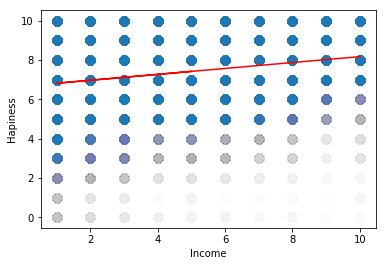

In [15]:
# X = Hapiness Y = Income
# Remove unuseful data of hapiness (no answer, don't know, ...)
data_income_df = data_df[data_df['income'] < 77] #36445

X_income = data_income_df['income'].values.reshape(-1, 1)
Y_income = data_income_df['hapiness'].values.reshape(-1, 1)

linear_regressor = LinearRegression()
linear_regressor.fit(X_income, Y_income)
Y_pred_income = linear_regressor.predict(X_income)

plt.scatter(X_income, Y_income, s=100, alpha=0.00197)
plt.plot(X_income, Y_pred_income, color='red')
plt.xlabel('Income')
plt.ylabel('Hapiness')
plt.show()

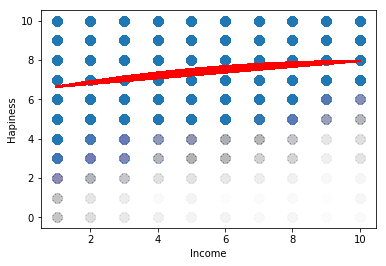

In [16]:
# Try if it's polynomial degree 2
poly_features = PolynomialFeatures(degree = 2) 
x_poly = poly_features.fit_transform(X_income)

lin_reg = LinearRegression() 
lin_reg.fit(x_poly, Y_income) 
y_pred = lin_reg.predict(x_poly)

plt.scatter(X_income, Y_income, s=100, alpha=0.00197)
plt.plot(X_income, y_pred, color='red')
plt.xlabel('Income')
plt.ylabel('Hapiness')
plt.show()

In [11]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X_sociability[:,0], Y_pred_sociability[:,0])
print('Sociability slope: ' + str(slope))

slope, intercept, r_value, p_value, std_err = stats.linregress(X_income[:,0], Y_pred_income[:,0])
print('Income slope:    ' + str(slope))

sociability slope: 0.2793494682849006
income slope:    0.15035870522762246


In [17]:
Y_sociability.shape

(43990, 1)

In [18]:
X_income.shape

(36311, 1)

In [20]:
# Pearsons correlation
X_sociability = X_sociability.reshape(43990, )
Y_sociability = Y_sociability.reshape(43990, )
X_income = X_income.reshape(36311, )
Y_income = Y_income.reshape(36311, )

corr, _ = stats.pearsonr(X_sociability, Y_sociability)
print('Sociability Pearsons correlation: %.3f' % corr)

corr, _ = stats.pearsonr(X_income, Y_income)
print('Income Pearsons correlation: %.3f' % corr)

Sociability Pearsons correlation: 0.234
Income Pearsons correlation: 0.222


In [21]:
# Spearman's correlation
corr, _ = stats.spearmanr(X_sociability, Y_sociability)
print('Sociability Spearmans correlation: %.3f' % corr)

corr, _ = stats.spearmanr(X_income, Y_income)
print('Hapiness Spearmans correlation: %.3f' % corr)

Sociability Spearmans correlation: 0.211
Hapiness Spearmans correlation: 0.206
